# Shopee Product Classification: Data Exploration and Pre-processing

In [11]:
# Shift this to the root of this project or run the following code for this to work from /notebooks
import sys
sys.path.insert(0, '../')

rootdir = '..'

In [ ]:
# Run this cell instead if running this notebook from the project root
rootdir = ''

Notebook to explore and pre-process the product image dataset obtained from the Shopee web scraper.

* From the crawler, we obtained ~3000 images from each of the 27 categories. 
* We exclude 3 miscellaneous categories: 'ShopeePay-Near-Me', 'Miscellaneous', 'Dining-Travel-Services', thus 24 categories remain.

### Data Exploration
* Number of images sampled per category
* Image similarity within categories
* Image similarity across categories


### Data Pre-processing
* Remove duplicates
* Background Removal
* Manual checks and selection
* Data normalization

## Imports and Config

In [1]:
!pip install scikit-image
!pip install torchvision
!pip install opencv-python
!pip install torchtext --user
!pip install --quiet --pre torchvision --user
!pip install imagehash
!pip inatsll pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.12.1 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import imagehash
from PIL import Image
import pandas as pd
import cv2

## Import Image Dataset

In [12]:
import os
from model.text import dataset
from model.dataset import all_categories
from scripts.crawler import product_category_and_names

data_dir = os.path.join(rootdir, 'data')
image_dir = os.path.join(rootdir, 'data/images/')

_, product_names = product_category_and_names(data_dir)
data = dataset.DataSet(product_names, path=image_dir, categories=all_categories)
data.load_all()

100%|██████████| 2847/2847 [00:07<00:00, 387.52it/s]


# Data Exploration
## Category labels and number of images
Close to 3000 images for each of the 24 categories

<BarContainer object of 24 artists>

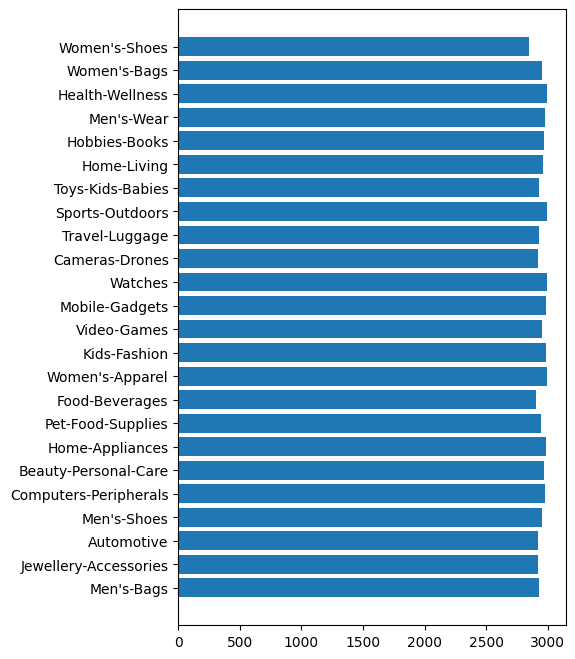

In [13]:
cats, items = zip(*data.image_count_per_category().items())
fig, ax = plt.subplots(figsize=(5, 8))
ax.barh(cats, items)

## Explore image samples in each category

In [59]:
all_categories = data.categories
widgets.interact_manual.opts['manual_name'] = 'Show samples'
im = widgets.interact_manual(lambda category: data.plot_samples(category), category=all_categories)

interactive(children=(Dropdown(description='category', options=("Men's-Bags", 'Jewellery-Accessories', 'Automo…

## Repeated images
We observed that there are some repeated images in the same category, due to repeated listings by the same seller.
Here are some examples of repeated images.

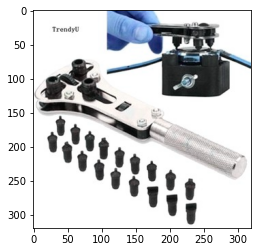

In [63]:
img = cv2.imread(image_dir + '/Watches-cat\\2494323104.png')
plt.imshow(img)

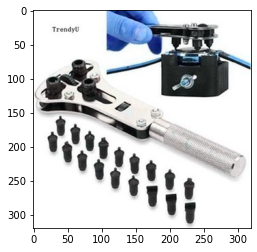

In [64]:
img2 = cv2.imread(image_dir + '/Watches-cat\\2494323109.png')
plt.imshow(img2)

## Exploring image similarities within the same category

In [67]:
temp_columns = ['img_file', 'img_label', 'img_hash', 'prev_file','prev_label', 'prev_hash', 'diff']
img_hash_df = pd.DataFrame(columns = temp_columns)

img_labels = list(data.labels.values())
img_files = list(data.labels)

for i in range(len(img_labels)):
    file = img_files[i]
    label = img_labels[i]
    curr_hash =imagehash.average_hash(Image.open(file))
    

    if (i == 0 | prev_label != label):
        prev_file = file
        prev_hash = curr_hash
        prev_label = label
        diff = -1
        
    else:
        #calculate the difference in image hash between current image and previous image
        diff = prev_hash - curr_hash
    
    img_hash_df.loc[len(img_hash_df)] = [file, label, curr_hash, prev_file, prev_label, prev_hash, diff]

    prev_hash = curr_hash
    prev_file = file
    prev_label = label

img_hash_df

,img_file,img_label,img_hash,prev_file,prev_label,prev_hash,diff
0,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,-1
1,data/images\Men's-Bags-cat\10005722417.png,0,ffdf9110110001ff,data/images\Men's-Bags-cat\10000470611.png,0,fbe1c0000183470f,21
2,data/images\Men's-Bags-cat\10013979365.png,0,ffef8f8103c180f3,data/images\Men's-Bags-cat\10005722417.png,0,ffdf9110110001ff,18
3,data/images\Men's-Bags-cat\10022976986.png,0,ffff0000000000ff,data/images\Men's-Bags-cat\10013979365.png,0,ffef8f8103c180f3,16
4,data/images\Men's-Bags-cat\10026709904.png,0,fff0f3838344a4fc,data/images\Men's-Bags-cat\10022976986.png,0,ffff0000000000ff,23
...,...,...,...,...,...,...,...
4795,data/images\Women's-Shoes-cat\1212509371.png,23,c39f1f0f33393800,data/images\Women's-Shoes-cat\12101669285.png,23,fff78311c1c18101,31
4796,data/images\Women's-Shoes-cat\12137477152.png,23,ffffff0b0081fdff,data/images\Women's-Shoes-cat\1212509371.png,23,c39f1f0f33393800,30
4797,data/images\Women's-Shoes-cat\1214944213.png,23,f70093ff800091ff,data/images\Women's-Shoes-cat\12137477152.png,23,ffffff0b0081fdff,25
4798,data/images\Women's-Shoes-cat\1220771118.png,23,0307072797cf7f07,data/images\Women's-Shoes-cat\1214944213.png,23,f70093ff800091ff,36


In [70]:
img_hash_df.describe()

,img_label,prev_label,diff
count,4800.000000,4800.000000,4800.000000
mean,11.500000,11.495208,28.535417
std,6.922908,6.922906,8.102978
min,0.000000,0.000000,-1.000000
25%,5.750000,5.000000,24.000000
50%,11.500000,11.000000,29.000000
75%,17.250000,17.000000,34.000000
max,23.000000,23.000000,58.000000


In [74]:
data.cat_reverse_map = dict([(value, key) for key, value in data.cat_map.items()])
img_hash_df['img_label_name'] = img_hash_df['img_label'].map(data.cat_reverse_map)
labelhashdiff = img_hash_df.groupby(['img_label_name'])['diff'].mean().sort_values()
labelhashdiff

img_label_name
Men's-Bags               25.475
Food-Beverages           26.195
Video-Games              26.595
Cameras-Drones           26.740
Computers-Peripherals    27.050
Hobbies-Books            27.785
Health-Wellness          27.845
Home-Appliances          28.195
Men's-Wear               28.335
Sports-Outdoors          28.350
Beauty-Personal-Care     28.425
Women's-Shoes            28.890
Men's-Shoes              28.975
Women's-Bags             29.025
Kids-Fashion             29.125
Watches                  29.305
Mobile-Gadgets           29.330
Automotive               29.390
Travel-Luggage           29.445
Toys-Kids-Babies         29.540
Pet-Food-Supplies        29.700
Jewellery-Accessories    30.265
Home-Living              30.280
Women's-Apparel          30.590
Name: diff, dtype: float64

The top 5 categories with highest image similarity for consecutive images in the dataset are:
* Men's-Bags
* Food-Beverages
* Video-Games
* Cameras-Drones
* Computers-Peripherals

The categories with lowest image similarity for consecutive images in the dataset are:
* Women's-Apparel
* Home-Living
* Jewellery-Accessories
* Pet-Food-Supplies
* Toys-Kids-Babies

Categories with low image similarity within a category may present challenges when training the model to predict the product category.

## Image similarity within and across categories

In [75]:
temp_columns = ['label1', 'label2', 'hash1', 'avg_diff']
img_diff_df = pd.DataFrame(columns = temp_columns)
img_diff_df

,label1,label2,hash1,hash2,diff


In [ ]:
i=0
j=0
for index1, row in img_hash_df.iterrows():
    label1 = row['img_label']
    curr_hash = row['img_hash']
    curr_diff = 0
    j = 0
    prev_label = label1
    for index2, row in img_hash_df.iterrows():

        label2 = row['img_label']
        hash2 = row['img_hash']
        
        if prev_label == label2 & index1 != index2:
            #keep accumulating the differences in imagehash for other images with the same category label
            curr_diff += curr_hash-hash2
            j += 1

        else: 
            #change in label, get the average of differences for the previous category label
            avg_diff = curr_diff / j
            #append 
            img_diff_df.loc[len(img_diff_df)] = [label1, prev_label, curr_hash, avg_diff]
            #reset j and curr_diff
            j = 0
            curr_diff = curr_hash-hash2
        prev_label = label2
    #last image in last category
    j += 1
    avg_diff = curr_diff / j
    img_diff_df.loc[len(img_diff_df)] = [label1, label2, curr_hash, avg_diff]


In [ ]:
img_diff_df['label1_name'] = img_diff_df['label1'].map(data.cat_reverse_map)
img_diff_df['label2_name'] = img_diff_df['label2'].map(data.cat_reverse_map)

img_diff_df

In [ ]:
img_diff_df.describe()

In [ ]:
import numpy as np
img_diff_df['same_label'] = np.where(img_diff_df['label1'] == img_diff_df['label2'], 1, 0)

### Image similarity within the same category
Categories which have high image similarity within its category are more likely to be have a better fit during training to produce a model which can better predict the correct product category.

In [ ]:
same_label_df  = img_diff_df[img_diff_df['same_label']==1]
samelabelhashdiff = same_label_df.groupby(['label1_name'])['avg_diff'].mean()


In [ ]:
same_label_df.head()

In [ ]:
samelabelhashdiff.sort_values()

### Image similarity for each category with other categories

Categories which have high image similarity with other categories may have more likely mix-up in the predicted product category.

In [ ]:
diff_label_df  = img_diff_df[img_diff_df['same_label']==0]
difflabelhashdiff = diff_label_df.groupby(['label1_name','label2_name'])['avg_diff'].mean()
difflabelhashdiff = difflabelhashdiff.reset_index()
difflabelhashdiff.sort_values(by = 'avg_diff', ascending = False)

In [49]:
labelallhashdiff = difflabelhashdiff.groupby(['label1_name'])['avg_diff'].mean()
labelallhashdiff.sort_values()

label1_name
Home-Living              28.247826
Hobbies-Books            28.356522
Toys-Kids-Babies         28.365217
Women's-Apparel          28.373913
Watches                  28.408696
Kids-Fashion             28.421739
Video-Games              28.439130
Food-Beverages           28.465217
Men's-Wear               28.469565
Cameras-Drones           28.486957
Mobile-Gadgets           28.491304
Jewellery-Accessories    28.508696
Men's-Shoes              28.530435
Women's-Bags             28.534783
Home-Appliances          28.547826
Beauty-Personal-Care     28.552174
Automotive               28.560870
Travel-Luggage           28.565217
Pet-Food-Supplies        28.569565
Health-Wellness          28.578261
Men's-Bags               28.604348
Computers-Peripherals    28.608696
Women's-Shoes            28.639130
Sports-Outdoors          28.673913
Name: diff, dtype: float64

The image hash similarity measures are just a very rough measure of how similar the images are as they are based on raw image values. We observe that even though each product listing supposedly only belongs to 1 category, some categories might have overlapping definitions, or some products might not fall cleanly into a single category. For example, a T-shirt could fall into Women's-Aparrel of Men's-Wear. 

We select a subset of 9 categories where there would be no ovelap in products with each other.
* Women's-Bags
* Men's-Shoes
* Men's-Wear
* Food-Beverages
* Watches
* Video-Games
* Cameras-Drones
* Home-Appliances
* Hobbies-Books

# Data Pre-Processing

## Remove duplicates
We remove the duplicates to prevent information leakage from train dataset to validation or test dataset. 

In [9]:
from scripts.image_clean import get_duplicate_images

def images_to_remove(similar):
    items = set()
    for (a, b) in similar:
        if a in items:
            items.add(b)
        else:
            items.add(a)
    return list(items)

# Get list of duplicates, based on pixel-wise comparison
img_list = {}
for dir in os.listdir(image_dir):
    if dir[0] == '.':
        continue
    if not '-cat' in dir:
        continue
    img_list[dir] = images_to_remove(get_duplicate_images(os.path.join(image_dir, dir)))

img_list

{"Men's-Bags-cat": ["../data/images/Men's-Bags-cat/1514768360.png",
  "../data/images/Men's-Bags-cat/6215832637.png"],
 'Jewellery-Accessories-cat': ['../data/images/Jewellery-Accessories-cat/3546786727.png',
  '../data/images/Jewellery-Accessories-cat/9367991278.png',
  '../data/images/Jewellery-Accessories-cat/10354395291.png'],
 'Automotive-cat': ['../data/images/Automotive-cat/3916286302.png',
  '../data/images/Automotive-cat/1478895187.png'],
 "Men's-Shoes-cat": ["../data/images/Men's-Shoes-cat/3937682796.png",
  "../data/images/Men's-Shoes-cat/2117837329.png",
  "../data/images/Men's-Shoes-cat/7758597744.png"],
 'Computers-Peripherals-cat': [],
 'Beauty-Personal-Care-cat': [],
 'Miscellaneous-cat': ['../data/images/Miscellaneous-cat/9190054634.png',
  '../data/images/Miscellaneous-cat/11333368498.png',
  '../data/images/Miscellaneous-cat/8290584875.png',
  '../data/images/Miscellaneous-cat/22500332276.png',
  '../data/images/Miscellaneous-cat/14506771154.png',
  '../data/images/M

In [11]:
# Remove duplicate files
for _, files in img_list.items():
    for f in files:
        os.remove(f)

## Text Removal
We observed that many shopee images have item description, brand names or generic text such as 'Sale' in the images. Some of these text may occur across categories. We try using a text removal tool to remove the text in each images. However this doesn't work very well as this would introduce additional smudges of colour in some cases. Hence we decided not to proceed with it.

An example of such smudges is shown below.

In [ ]:
!pip install keras-ocr

Looking for /Users/naomileow/.keras-ocr/craft_mlt_25k.h5
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-15 17:08:06.717789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 17:08:06.717992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Looking for /Users/naomileow/.keras-ocr/crnn_kurapan.h5


2022-11-15 17:08:11.180908: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-15 17:08:11.421312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 907ms/step


2022-11-15 17:08:12.928538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 17:08:13.993103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 17:08:14.005292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 17:08:14.372810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-15 17:08:14.386642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


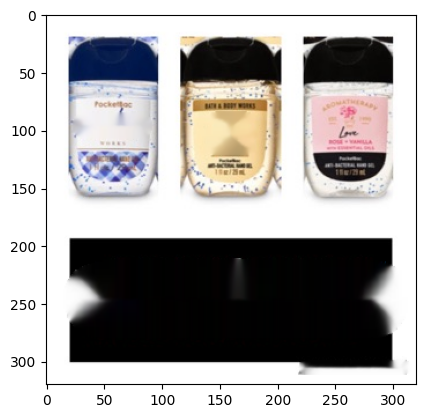

In [6]:
import keras_ocr
from scripts.image_clean import crop_and_inpaint_text

pipeline = keras_ocr.pipeline.Pipeline()
filepath = os.path.join(rootdir, 'data/images/Beauty-Personal-Care-cat/1874331.png')
out = crop_and_inpaint_text(filepath, pipeline, 1)

import matplotlib.pyplot as plt
plt.imshow(out)

## Background Removal
We remove the background of the images to reduce the impact of noise on the training of our model. This has the bonus of also removing text in the background in some cases.

In [ ]:
# We use rembg as the background removal tool.
# Important note: rembg uses a pre-trained u-net to identify the background of a given image. Follow the instructions in https://github.com/danielgatis/rembg to download the required model 
!pip install rembg

In [ ]:
from scripts.image_clean import remove_background

out_dir = os.path.join(rootdir, 'data/images/processed_images')

remove_background(image_dir, out_dir)

We observe that although the background removal tool works well in most cases, there are some cases where the object is removed instead of the background. This will require manual checks to remove such images for now.

## Data selection
We go through the images in the 9 categories to remove images that have been mangled by the background removal tool. In addition, we select 500 images for each category to be used to train our model. The selected images are can be downloaded from this [Google Drive link](https://drive.google.com/file/d/1JANPY3-_wZDl9V0P83JTJbTqeHRaCijQ/view?usp=share_link)

## Data Pre-processing
The following preprocessing is done by the `DataSet` class when it loads the images and their corresponding categories:
* Center crop image to remove image borders
* Resize image to 224 by 224
* Normalise pixel values

# Conclusion for Data Exploration and Pre-Processing

### Data Exploration:
* Number of images sampled per category
* Image Size
* Image similarity within categories
* Image similarity across categories

### Data Pre-processing:
* Remove duplicates
* Background Removal
* Data Normalization - resize images to 224 by 224, normalize pixel values